# Stability function of a Runge-Kutta method

Recall that the {prf:ref}`general form of a Runge-Kutta method<rk-definition>` is

$$ \begin{align*}
    y_{n+1}&=y_n + h \sum_{i=1}^s b_i k_i ,\\
    k_i &=f(t_n +c_i h,y_n +h\sum_{j=1}^s a_{ij} k_j ).
\end{align*} $$

Let $Y_i = y_n + h \displaystyle \sum_{j=1}^s a_{ij} k_i$ and applying the method to the test equation $y' = \lambda y$ we have

$$ \begin{align*}
    y_{n+1} &=y_n +h\lambda \sum_{i=1}^s b_i Y_i ,\\
    Y_i &=y_n +h\lambda \sum_{j=1}^s a_{ij} Y_j .
\end{align*} $$

Let $z = h\lambda$ and expanding out the summations in the stage values

$$ \begin{align*}
    Y_1 &=y_n +z(a_{11} Y_1 + a_{12} Y_2 + \cdots + a_{1s} Y_s),\\
    Y_2 &=y_n +z(a_{21} Y_1 + a_{22} Y_2 + \cdots + a_{2s} Y_s),\\
    &\vdots \\
    Y_s &=y_n +z(a_{s1} Y_1 + a_{s2} Y_2 + \cdots + a_{ss} Y_s).
\end{align*} $$

We can write these as the matrix equation

$$ \begin{pmatrix} Y_1 \\ Y_2 \\ \vdots \\ Y_s \end{pmatrix} = 
\begin{pmatrix} y_n \\ y_n \\ \vdots \\ y_n \end{pmatrix}
+ z
\begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1s} \\
    a_{21} & a_{22} & \cdots & a_{2s} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{s1} & a_{s2} & \cdots & a_{ss}
\end{pmatrix} 
\begin{pmatrix} Y_1 \\ Y_2 \\ \vdots \\ Y_s \end{pmatrix}. $$

Let $Y=(Y_1 ,Y_2 ,\dots ,Y_s )^T$ and $\mathbf{e}=(1,1,\dots ,1)^T$ then

$$ Y = \mathbf{e} y_n + z A Y. $$(rk-stability-Y-equation)

Expanding the summation in the equation for updating the solution over a single step and using $z = h \lambda$ gives

$$ y_{n+1} = y_n + z (b_1 Y_1 + b_2 Y_2 + \cdots + b_s Y_s), $$

which can be written as the matrix equation

$$ \begin{align*}
    y_{n+1} = y_n + z
    \begin{pmatrix}
        b_1 & b_2 & \cdots & b_s 
    \end{pmatrix}
    \begin{pmatrix}
        Y_1 \\ Y_2 \\ \vdots \\ Y_s
    \end{pmatrix}. 
\end{align*} $$

Since $\mathbf{b}$ is a column vector then the vector form of a Runge-Kutta method for solving the test equation $y' = \lambda y$ is

$$ y_{n+1} =y_n + z \mathbf{b}^T Y. $$(rk-stability-yn+1-equation)

The stability functions for explicit and implicit Runge-Kutta methods are derived using different approaches.

(erk-rz-section)=
## Stability function of an explicit Runge-Kutta method

To derive the stability function of an explicit Runge-Kutta method we rearrange equation {eq}`rk-stability-Y-equation`

$$ \begin{align*}
    Y - zAY &= \mathbf{e}y_n \\
    (I - zA)Y &= \mathbf{e}y_n\\
    Y&= (I-zA)^{-1} \mathbf{e}y_n,
\end{align*} $$

and substituting into equation {eq}`rk-stability-yn+1-equation` gives

$$ \begin{align*}
    y_{n+1} &= y_n +z\mathbf{b}^T (I-zA)^{-1} \mathbf{e} y_n \\
    &= (1 + z \mathbf{b}^T (I - zA)^{-1} \mathbf{e})y_n ,
\end{align*} $$

so the stability function is

$$ \begin{align*}
    R(z)=1 + z\mathbf{b}^T (I - zA)^{-1} \mathbf{e}
\end{align*} $$

Using the geometric series of matrices

$$ \begin{align*}
    (I - zA)^{-1} = \sum_{k=0}^{\infty} (zA)^k 
\end{align*} $$

gives the following definition for the stability function of an explicit method.

:::{prf:definition} Stability function of an explicit Runge-Kutta method
:label: erk-rz-definition

$$ \begin{align*}
    R(z) &= 1 + \sum_{k=0}^{\infty} \mathbf{b}^T A^k \mathbf{e}\,z^{k+1} \\
    &= 1 + \mathbf{b}^T \mathbf{e}\,z+\mathbf{b}^T A\mathbf{e}\,z^2 +\mathbf{b}^T A^2 \mathbf{e}\,z^3 + \cdots
\end{align*} $$(erk-stability-rz-equation)
:::

Since the solution to the test equation is $y=e^{\lambda t}$, over one step of an explicit Runge-Kutta method we would expect the local truncation errors to change at a rate of $e^z$. The series expansion of $e^z$ is

$$e^z = \sum_{k=0}^{\infty} \frac{1}{k!} z^k = 1 + z + \frac{1}{2!}z^2 + \frac{1}{3!}z^3 + \frac{1}{4!}z^4 + \cdots$$(erk-stability-ez-equation)

Comparing the coefficients of $z^k$ in equations {eq}`erk-stability-rz-equation` and {eq}`erk-stability-ez-equation` we have

$$ \begin{align*}
    \frac{1}{k!}= \mathbf{b}^T A^{k-1} \mathbf{e},
\end{align*} $$

which must be satisfied up to the $k$th term for an order $k$ explicit method to be stable. 

### Code 

The code below calculates the coefficients for the stability function of the RK4 method. 

:::::{tab-set}
::::{tab-item} Python
```python
import sympy as sp

# Define ERK method
A = sp.Matrix([[0, 0, 0, 0],
               [sp.Rational(1,2), 0, 0, 0],
               [0, sp.Rational(1,2), 0, 0],
               [0, 0, 1, 0]])
b = sp.Matrix([sp.Rational(1,6), sp.Rational(1,3), sp.Rational(1,3), sp.Rational(1,6)])
e = sp.ones(4,1)

# Determine coefficients of the stability function
for k in range(4):
    display(b.T * A ** k * e)
```
::::

::::{tab-item} MATLAB
```matlab
% Define ERK method
A = [0, 0, 0, 0 ;
     1/2, 0, 0, 0 ;
     0, 1/2, 0, 0 ;
     0, 0, 1, 0];
b = [1/6 ; 1/3 ; 1/3 ; 1/6];
e = ones(4, 1);

% Determine coefficients for the stability function
for k = 1 : 4
    sym(b' * A ^ (k - 1) * e)
end
```
::::
:::::

In [1]:
import sympy as sp

# Define ERK method
A = sp.Matrix([[0, 0, 0, 0],
               [sp.Rational(1,2), 0, 0, 0],
               [0, sp.Rational(1,2), 0, 0],
               [0, 0, 1, 0]])
b = sp.Matrix([sp.Rational(1,6), sp.Rational(1,3), sp.Rational(1,3), sp.Rational(1,6)])
e = sp.ones(4,1)

# Determine coefficients of the stability function
for k in range(4):
    display(b.T * A ** k * e)

Matrix([[1]])

Matrix([[1/2]])

Matrix([[1/6]])

Matrix([[1/24]])

## Plotting stability regions

To plot the stability region of a Runge-Kutta method we first define a matrix $Z = X + Yi$ where $i = \sqrt{-1}$ is the imaginary number for a range of values of $X$ and $Y$ and use this matrix to calculate $R(Z)$ for the particular method. Then we plot a contour plot of $|R(Z)|$ using the contour where $|R(z)|=1$. 

:::::{tab-set}

::::{tab-item} Python

The NumPy commands `np.linspace()` and `np.meshgrid()` are used to generate matrices for `X` and `Y` which are then used to calculate `Z = X + Y * 1i`
(note that imaginary numbers in Python are defined using `1j`).

```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability functions
RK4 = 1 + Z + 1/2 * Z ** 2 + 1/6 * Z ** 3 + Z ** 4 / 24

# Plot stability region
fig = plt.figure()
plt.contourf(X, Y, abs(RK4), levels=[0, 1], colors="#99ccff")    # plot stability regions
plt.contour(X, Y, abs(RK4), colors= "k", levels=[0, 1])          # add outlines
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()
```
::::

::::{tab-item} MATLAB

The MATLAB commands `linspace()` and `meshgrid()` are used to generate matrices for `X` and `Y` which are then used to calculate `Z = X + Y * 1i` (note that imaginary numbers in MATLAB are defined using `1i`). Note that the powers of `Z` are calculated using element-wise power where `.^` is used instead of `^`. 

```matlab
% Generate z values
xmin = -5;
xmax = 2;
ymin = -3.5;
ymax = 3.5;
[X, Y] = meshgrid(linspace(xmin, xmax, 200), linspace(ymin, ymax, 200));
Z = X + Y * 1i;

% Define stability function 
R = 1 + Z + 1/2 * Z .^2 + 1/6 * Z .^ 3 + 1/24 * Z .^ 4;

% Plot stability region
contourf(X, Y, abs(R), [0, 1], LineWidth=2)
xline(0, LineWidth=2)
yline(0, LineWidth=2)
colormap([153, 204, 255 ; 255, 255, 255] / 255)
axis equal
axis([xmin, xmax, ymin, ymax])
xlabel("$\mathrm{Re}(z)$", FontSize=12, Interpreter="latex")
ylabel("$\mathrm{Im}(z)$", FontSize=12, Interpreter="latex")
```
::::
:::::

The regions of absolute stability for the Euler method and the explicit Runge-Kutta methods of order 2, 3 and 4 are plotted in {numref}`erk-stability-regions-figure`.

:::{glue:figure} erk-stability-regions-plot
:name: erk-stability-regions-figure
:figwidth: 600

Regions of absolute stability for explicit Runge-Kutta methods of order 1 to 4.
:::

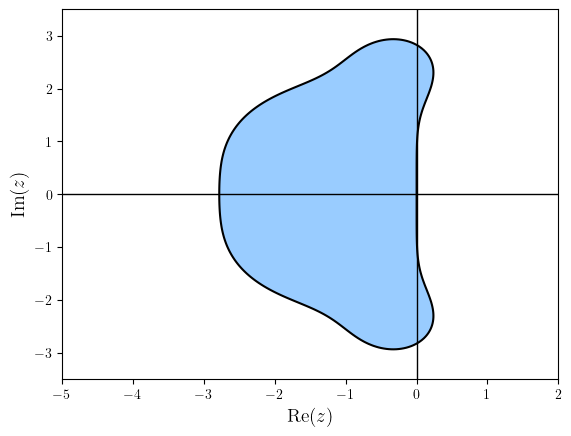

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability functions
RK4 = 1 + Z + 1/2 * Z ** 2 + 1/6 * Z ** 3 + Z ** 4 / 24

# Plot stability region
fig = plt.figure()
plt.contourf(X, Y, abs(RK4), levels=[0, 1], colors="#99ccff")    # plot stability regions
plt.contour(X, Y, abs(RK4), colors= "k", levels=[0, 1])          # add outlines
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()

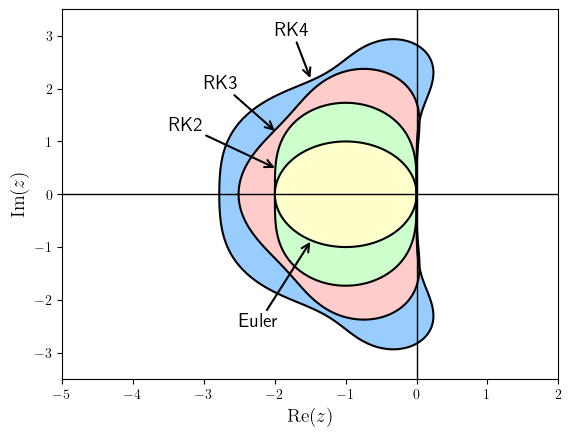

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability functions
Euler = 1 + Z
RK2 = Euler + Z ** 2 / 2
RK3 = RK2 + Z ** 3 / 6
RK4 = RK3 + Z ** 4 / 24

# Plot stability region
fig = plt.figure()
plt.contourf(X, Y, abs(RK4), levels=[0, 1], colors="#99ccff")    # plot stability regions
plt.contourf(X, Y, abs(RK3), levels=[0, 1], colors="#ffcccc")
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ccffcc")
plt.contourf(X, Y, abs(Euler), levels=[0, 1], colors="#ffffcc")
plt.contour(X, Y, abs(RK4), colors= "k", levels=[0, 1])          # add outlines
plt.contour(X, Y, abs(RK3), colors= "k", levels=[0, 1])
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.contour(X, Y, abs(Euler), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("RK4", xy=(-1.5, 2.2), xytext=(-2, 3), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK3", xy=(-2, 1.2), xytext=(-3, 2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK2", xy=(-2, 0.5), xytext=(-3.5, 1.2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("Euler", xy=(-1.5, -0.9), xytext=(-2.5, -2.5), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.show()

from myst_nb import glue
glue("erk-stability-regions-plot", fig, display=False)

fig.savefig("../Images/ERK_stability.png", dpi=fig.dpi)

:::::::{prf:example}
:label: erk-stability-example

An explicit Runge-Kutta method is defined by the following Butcher tableau

$$ \begin{align*}\begin{array}{c|cccc}
0 &  &  &  & \\
1/2 & 1/2 &  &  & \\
3/4 & 0 & 3/4 &  & \\
1 & 2/9 & 1/3 & 4/9 & \\ 
\hline
& 7/24 & 1/4 & 1/3 & 1/8
\end{array}\end{align*} $$

(i) Determine the stability function for this Runge-Kutta method and hence find its order;

::::{dropdown} Solution

Here we have

$$ \begin{align*}
    A &= \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        1/2 & 0 & 0 & 0 \\
        0 & 3/4 & 0 & 0 \\
        2/9 & 1/3 & 4/9 & 0
    \end{pmatrix}, &
    \mathbf{b} &= \begin{pmatrix} 7/24 \\ 1/4 \\ 1/3 \\ 1/8 \end{pmatrix}.
\end{align*} $$

Calculating $\mathbf{b}^TA^{k - 1}\mathbf{e}$ for $k = 1, \ldots, 4$

$$ \begin{align*}
    k &= 1, & \mathbf{b}^TA^0 \mathbf{e} &= 
    \begin{pmatrix} 7/24 \\ 1/4 \\ 1/3 \\ 1/8 \end{pmatrix}
    \begin{pmatrix} 
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 1 
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} = 1, \\
    k &= 2, & \mathbf{b}^TA^1 \mathbf{e} &= 
    \begin{pmatrix} 7/24 \\ 1/4 \\ 1/3 \\ 1/8 \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        1/2 & 0 & 0 & 0 \\
        0 & 3/4 & 0 & 0 \\
        2/9 & 1/3 & 4/9 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
    = \frac{1}{2}, \\
    k &= 3, & \mathbf{b}^TA^2 \mathbf{e} &= 
    \begin{pmatrix} 7/24 \\ 1/4 \\ 1/3 \\ 1/8 \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        3/8 & 0 & 0 & 0 \\
        1/6 & 1/3 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
    = \frac{3}{16}, \\
    k &= 4, & \mathbf{b}^TA^3 \mathbf{e} &= 
    \begin{pmatrix} 7/24 \\ 1/4 \\ 1/3 \\ 1/8 \end{pmatrix}
    \begin{pmatrix}
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 \\
        1/6 & 0 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} 
    = \frac{1}{48}.
\end{align*} $$

So the stability function is

$$ \begin{align*}
    R(z) = 1 + z + \frac{1}{2} z^2 + \frac{3}{16} z^3 + \frac{1}{48} z^4,
\end{align*} $$

which agrees to the series expansion of $e^z$ from equation {eq}`erk-stability-ez-equation` up to and including the $z^2$ term. Therefore this method is of order 2.
::::
(ii) plot the region of absolute stability and that of an explicit method on the same order on the same set of axes;

::::::{dropdown} Solution

:::{glue:figure} erk-stability-regions-example-plot
:figwidth: 600
:::

Code

:::::{tab-set}
::::{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability function
ERK = 1 + Z + 1/2 * Z ** 2 + 3/16 * Z ** 3 + 1/48 * Z ** 4
RK2 = 1 + Z + Z ** 2 / 2

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(ERK), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(ERK), colors= "k", levels=[0, 1])
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ffcccc")
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=2)
plt.axvline(0, color="k", linewidth=2)
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.annotate("ERK", xy=(-1.5, 2.2), xytext=(-2, 3), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.annotate("RK2", xy=(-2, 0.5), xytext=(-3.5, 1.2), fontsize=14, arrowprops=dict(arrowstyle="->", lw=1.5, shrinkA=0, shrinkB=0, ec="k"))
plt.show()
:::
::::

::::{tab-item} MATLAB
```matlab
% Generate z values
xmin = -5;
xmax = 2;
ymin = -4;
ymax = 4;
[X, Y] = meshgrid(linspace(xmin, xmax, 200), linspace(ymin, ymax, 200));
Z = X + Y * 1i;

% Define stability function 
ERK = 1 + Z + 1/2 * Z .^ 2 + 3/16 * Z .^ 3 + 1/48 * Z .^ 4;
RK2 = 1 + Z + 1/2 * Z .^ 2;

% Plot the region of absolute stability
contour(X, Y, abs(ERK), [1, 1], 'b-', 'linewidth', 2)
hold on
contour(X, Y, abs(RK2), [1, 1], 'r-', 'linewidth', 2)
hold off
xline(0, LineWidth=2)
yline(0, LineWidth=2)
axis([xmin, xmax, ymin, ymax])
xlabel('$\mathrm{Re}(z)$', 'FontSize', 16, 'Interpreter', 'latex')
ylabel('$\mathrm{Im}(z)$', 'FontSize', 16, 'Interpreter', 'latex')
legend('ERK', 'RK2', FontSize=12)
:::
::::
:::::
::::::

(iii) comment on the region of absolute stability of the two methods.

::::{dropdown} Solution
The interval of absolute stability for this method is $[-3,0]$ whereas for the second-order method we have $[-2,0]$. This means that this method is stable for larger values of $h$ so we can use fewer steps than the second-order method to calculate the solution to the same accuracy, although it does require the calculation of two additional stage values.
::::

:::::::

In [4]:
import sympy as sp

# Define ERK method
A = sp.Matrix([[0, 0, 0, 0],
               [sp.Rational(1,2), 0, 0, 0],
               [0, sp.Rational(3,4), 0, 0],
               [sp.Rational(2,3), sp.Rational(1,3), sp.Rational(4,9), 0]])
b = sp.Matrix([sp.Rational(7,24), sp.Rational(1/4), sp.Rational(1,3), sp.Rational(1,8)])
e = sp.ones(4,1)

# Determine coefficients of the stability function
for k in range(4):
    display(b.T * A ** k * e)

Matrix([[1]])

Matrix([[5/9]])

Matrix([[3/16]])

Matrix([[1/48]])

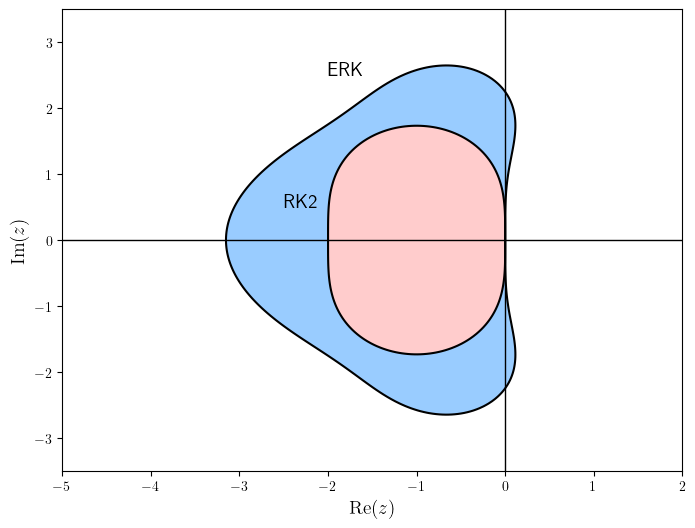

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 200),np.linspace(ymin, ymax, 200))
Z = X + Y * 1j

# Define stability function
ERK = 1 + Z + 1/2 * Z ** 2 + 3/16 * Z ** 3 + 1/48 * Z ** 4
RK2 = 1 + Z + Z ** 2 / 2

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(ERK), levels=[0, 1], colors="#99ccff")    # plot stability regions
plt.contourf(X, Y, abs(RK2), levels=[0, 1], colors="#ffcccc")
plt.contour(X, Y, abs(ERK), colors= "k", levels=[0, 1])          # add outlines
plt.contour(X, Y, abs(RK2), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)                           # add axis lines
plt.axvline(0, color="k", linewidth=1)
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.text(-2, 2.5, "ERK", fontsize=14)                            # add text labels
plt.text(-2.5, 0.5, "RK2", fontsize=14)
plt.show()

from myst_nb import glue
glue("erk-stability-regions-example-plot", fig, display=False)